## 라이브러리 임포트

In [1]:
import requests
import json
import sqlite3
import math

from requests import get

#ipywidgets 설치 안 되어 있으면 설치
try:
    import ipywidgets as widgets
    from IPython.display import display
    from IPython.display import clear_output 
    from IPython.core.display import HTML
    from IPython.display import Image
except ImportError:
    !pip install ipywidgets
    
#pandas 설치 안 되어 있으면 설치
try:
    import pandas as pd
except ImportError:
    !pip install pandas
    
#pretty table 설치 안 되어 있으면 설치
try:
    from prettytable import PrettyTable
except ImportError:
    !pip install prettytable

## 파일 다운로드 함수

이미지 다운로드를 위해 사용되었음.

In [2]:
def download(url, file_name):
    with open(file_name, "wb") as file:   # open in binary mode
        response = get(url)               # get request
        file.write(response.content)      # write to file

## haversine 함수

두 좌표를 이용하여 거리를 계산하여 반환

In [3]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c
    
    distance = round(distance, 1)

    return distance

## display_ui 함수 -> GUI표출을 위해 사용됨

In [4]:
def display_ui():
    # 텍스트 박스를 노트북에 표시
    display(text_Lat)
    display(text_Long)
    
    # 체크박스를 노트북에 표시
    display(checkbox_unisex)
    display(checkbox_diaper)
    display(checkbox_disaManCloset)
    display(checkbox_disaManUrinal)
    display(checkbox_disaWomanCloset)
    display(checkbox_childManCloset)
    display(checkbox_childManUrinal)
    display(checkbox_childWomanCloset)
    
    # 슬라이더 표시
    display(slider)
    
    # 버튼을 노트북에 표시
    display(button)
    
    display(HTML("<style>.container { width:95% !important; }</style>"))

## UI생성을 위한 텍스트 박스 생성

In [5]:
# 텍스트 박스 생성
text_Lat = widgets.Text(
    value='',  # 초기에 표시될 텍스트
    placeholder='long',  # 입력 필드에 표시될 플레이스홀더 텍스트
    description='사용자 위도:',  # 텍스트 박스 옆에 표시될 설명
    disabled=False  # 텍스트 박스 활성화/비활성화
)

text_Long = widgets.Text(
    value='',  # 초기에 표시될 텍스트
    placeholder='lat',  # 입력 필드에 표시될 플레이스홀더 텍스트
    description='사용자 경도:',  # 텍스트 박스 옆에 표시될 설명
    disabled=False  # 텍스트 박스 활성화/비활성화
)

toilet_name_in = widgets.Text(
    value='',  # 초기에 표시될 텍스트
    placeholder='화장실 이름',  # 입력 필드에 표시될 플레이스홀더 텍스트
    description='화장실명:',  # 텍스트 박스 옆에 표시될 설명
    disabled=False  # 텍스트 박스 활성화/비활성화
)

text_Lat.value = "33.4890681"
text_Long.value = "126.4983519"

## UI 생성을 위한 체크박스 위젯 생성

In [6]:
# 체크박스 위젯 생성
checkbox_unisex = widgets.Checkbox(
    value=True,  # 초기 선택 여부 (True/False)
    description='남녀공용화장실 포함',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)
checkbox_diaper = widgets.Checkbox(
    value=False,  # 초기 선택 여부 (True/False)
    description='기저기교환대 설치',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)
checkbox_disaManCloset = widgets.Checkbox(
    value=False,  # 초기 선택 여부 (True/False)
    description='남성 장애인 대변기 설치',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)
checkbox_disaManUrinal = widgets.Checkbox(
    value=False,  # 초기 선택 여부 (True/False)
    description='남성 장애인 소변기 설치',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)
checkbox_disaWomanCloset= widgets.Checkbox(
    value=False,  # 초기 선택 여부 (True/False)
    description='여성 장애인 대변기 설치',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)
checkbox_childManCloset = widgets.Checkbox(
    value=False,  # 초기 선택 여부 (True/False)
    description='남아 대변기 설치',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)
checkbox_childManUrinal = widgets.Checkbox(
    value=False,  # 초기 선택 여부 (True/False)
    description='남아 소변기 설치',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)
checkbox_childWomanCloset = widgets.Checkbox(
    value=False,  # 초기 선택 여부 (True/False)
    description='여아 대변기 설치',  # 체크박스 옆에 표시될 텍스트
    disabled=False  # 체크박스 활성화/비활성화
)

## ui생성을 위한 슬라이더 생성

In [7]:
# 슬라이더 생성
slider = widgets.IntSlider(
    value = 2,
    min = 0,
    max = 20,
    step = 1,
    description = '허용거리:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = 'd'
)

## UI표출을 위한 버튼 생성

In [8]:
# 버튼 생성
button = widgets.Button(
    description='검색',  # 버튼에 표시될 텍스트
    button_style='',  # 'success', 'info', 'warning', 'danger' 등의 스타일 옵션
    tooltip='Click me',  # 마우스를 버튼 위에 올렸을 때 보이는 툴팁
    icon='check'  # 버튼에 표시될 아이콘 (예: 'check')
)

image_button = widgets.Button(
    description='검색',  # 버튼에 표시될 텍스트
    button_style='',  # 'success', 'info', 'warning', 'danger' 등의 스타일 옵션
    tooltip='Click me',  # 마우스를 버튼 위에 올렸을 때 보이는 툴팁
    icon='check'  # 버튼에 표시될 아이콘 (예: 'check')
)

## 버튼 클릭 이벤트 핸들러

화장실 검색을 위한 SQL질의를 실행함

텍스트 박스로부터 사용자 위치를 읽어온다. 그 뒤 데이터베이스로부터 화장실의 위도와 경도를 읽어온 뒤, haversine알고리즘을 이용하여 직선거리를 계산하고, 직선거리를 데이터베이스에 업데이트 한다.

그 뒤, 체크박스 정보를 기반으로 SQL 질의문을 작성한다. 또한 ORDER BY구문을 이용하여 사용자로부터 가까운 순서대로 화장실을 표출한다.

이때, 화장실 정보 테이블과 관리주체 정보 테이블을 조인하여 관리주체의 전화번호를 표시하도록 한다. 다만, 전화번호 정보가 없으면 표시하지 않는다.

또한 슬라이더의 정보를 읽어 일정 거리 이하의 화장실만 표시되도록 한다.

텍스트 박스 내 좌표는 제주도청의 좌표임

In [9]:
# 버튼 클릭 이벤트 핸들러 정의
def on_button_clicked(b):
    clear_output()
    
    user_lat = float(text_Lat.value)
    user_lon = float(text_Long.value)
    
    cursor.execute("SELECT data_code, laCrdnt, loCrdnt FROM toilets")
    rows = cursor.fetchall()

    for row in rows:
        data_code, toilet_lat, toilet_lon = row
        distance = haversine(user_lat, user_lon, toilet_lat, toilet_lon)
        cursor.execute("UPDATE toilets SET distance = ? WHERE data_code = ?", (distance, data_code))
    db.commit()
    

    
    
    #query = "SELECT toilet_name, rnAddress, distance, opnTimeInfo, mwmncmnusetoiletYN, diaperExhgTable, maledspsnclosetcnt, maledspsnurinalcnt, femaledspsnclosetcnt, malechildclosetcnt, malechildurinalcnt, femalechildclosetcnt FROM toilets WHERE 1=1"
    query = '''SELECT toilet_name, rnAddress, distance, opnTimeInfo, manager.manager, manager.tel_no
    FROM toilets, manager
    WHERE 1=1 AND manager.manager = toilets.manager'''
    
    
    if not checkbox_unisex.value:
        query += " AND mwmncmnusetoiletYN  = 'N'"
    if checkbox_diaper.value:
        query += " AND diaperExhgTable = 'Y'"
    if checkbox_disaManCloset.value:
        query += " AND maledspsnclosetcnt > 0"
    if checkbox_disaManUrinal.value:
        query += " AND maledspsnurinalcnt > 0"
    if checkbox_disaWomanCloset.value:
        query += " AND femaledspsnclosetcnt > 0"
    if checkbox_childManCloset.value:
        query += " AND malechildclosetcnt > 0"
    if checkbox_childManUrinal.value:
        query += " AND malechildurinalcnt > 0"
    if checkbox_childWomanCloset.value:
        query += " AND femalechildclosetcnt > 0"
    
    query += f" AND distance < {slider.value}"
    
    query += " ORDER BY distance"
    
    cursor.execute(query)
    
    rows = cursor.fetchall()
    
    #columns = ['이름', '도로명주소', '거리', '개방시간', '남녀공용화장실', '기저귀교환대', '남성 장애인 대변기', '남성 장애인 소변기', '여성 장애인 대변기', '남아 대변기', '남아 소변기', '여아 대변기']
    columns = ['이름', '도로명주소', '거리', '개방시간', '관리주체', '전화번호']
    toilet_df = pd.DataFrame(rows, columns=columns)
    
    columns_list = toilet_df.columns.tolist()
    
    table = PrettyTable(columns_list)
    
    for row in toilet_df.itertuples(index=False):
        table.add_row(row)
    
    
    print(table)
        
    display_ui()
    display(HTML("<style>.container { width:95% !important; }</style>"))

        
# 버튼 클릭 이벤트에 핸들러 연결
button.on_click(on_button_clicked)

In [10]:
display_ui()

+--------------------------------------------+------------------------------------------------+------+---------------------------------------------------------------+-----------------------------------+--------------+
|                    이름                    |                   도로명주소                   | 거리 |                            개방시간                           |              관리주체             |   전화번호   |
+--------------------------------------------+------------------------------------------------+------+---------------------------------------------------------------+-----------------------------------+--------------+
|            제주도청1청사화장실             |         제주특별자치도 제주시 문연로 6         | 0.1  |                   (평일)09:00~18:00/주말휴무                  |               총무과              | 064-710-6937 |
|            제주도청2청사화장실             |        제주특별자치도 제주시 문연로 30         | 0.2  |                   (평일)09:00~18:00/주말휴무                  |               총무과              | 064-710-

Text(value='33.4890681', description='사용자 위도:', placeholder='long')

Text(value='126.4983519', description='사용자 경도:', placeholder='lat')

Checkbox(value=True, description='남녀공용화장실 포함')

Checkbox(value=True, description='기저기교환대 설치')

Checkbox(value=False, description='남성 장애인 대변기 설치')

Checkbox(value=False, description='남성 장애인 소변기 설치')

Checkbox(value=False, description='여성 장애인 대변기 설치')

Checkbox(value=False, description='남아 대변기 설치')

Checkbox(value=False, description='남아 소변기 설치')

Checkbox(value=False, description='여아 대변기 설치')

IntSlider(value=20, continuous_update=False, description='허용거리:', max=20)

Button(description='검색', icon='check', style=ButtonStyle(), tooltip='Click me')

## 이미지 표시 부분

사진을 보고싶은 화장실의 이름을 입력하고 버튼을 클릭하면 제주특별자치도 API에 접속하여 이미지를 다운로드 받은 뒤 유저에게 표시해준다.

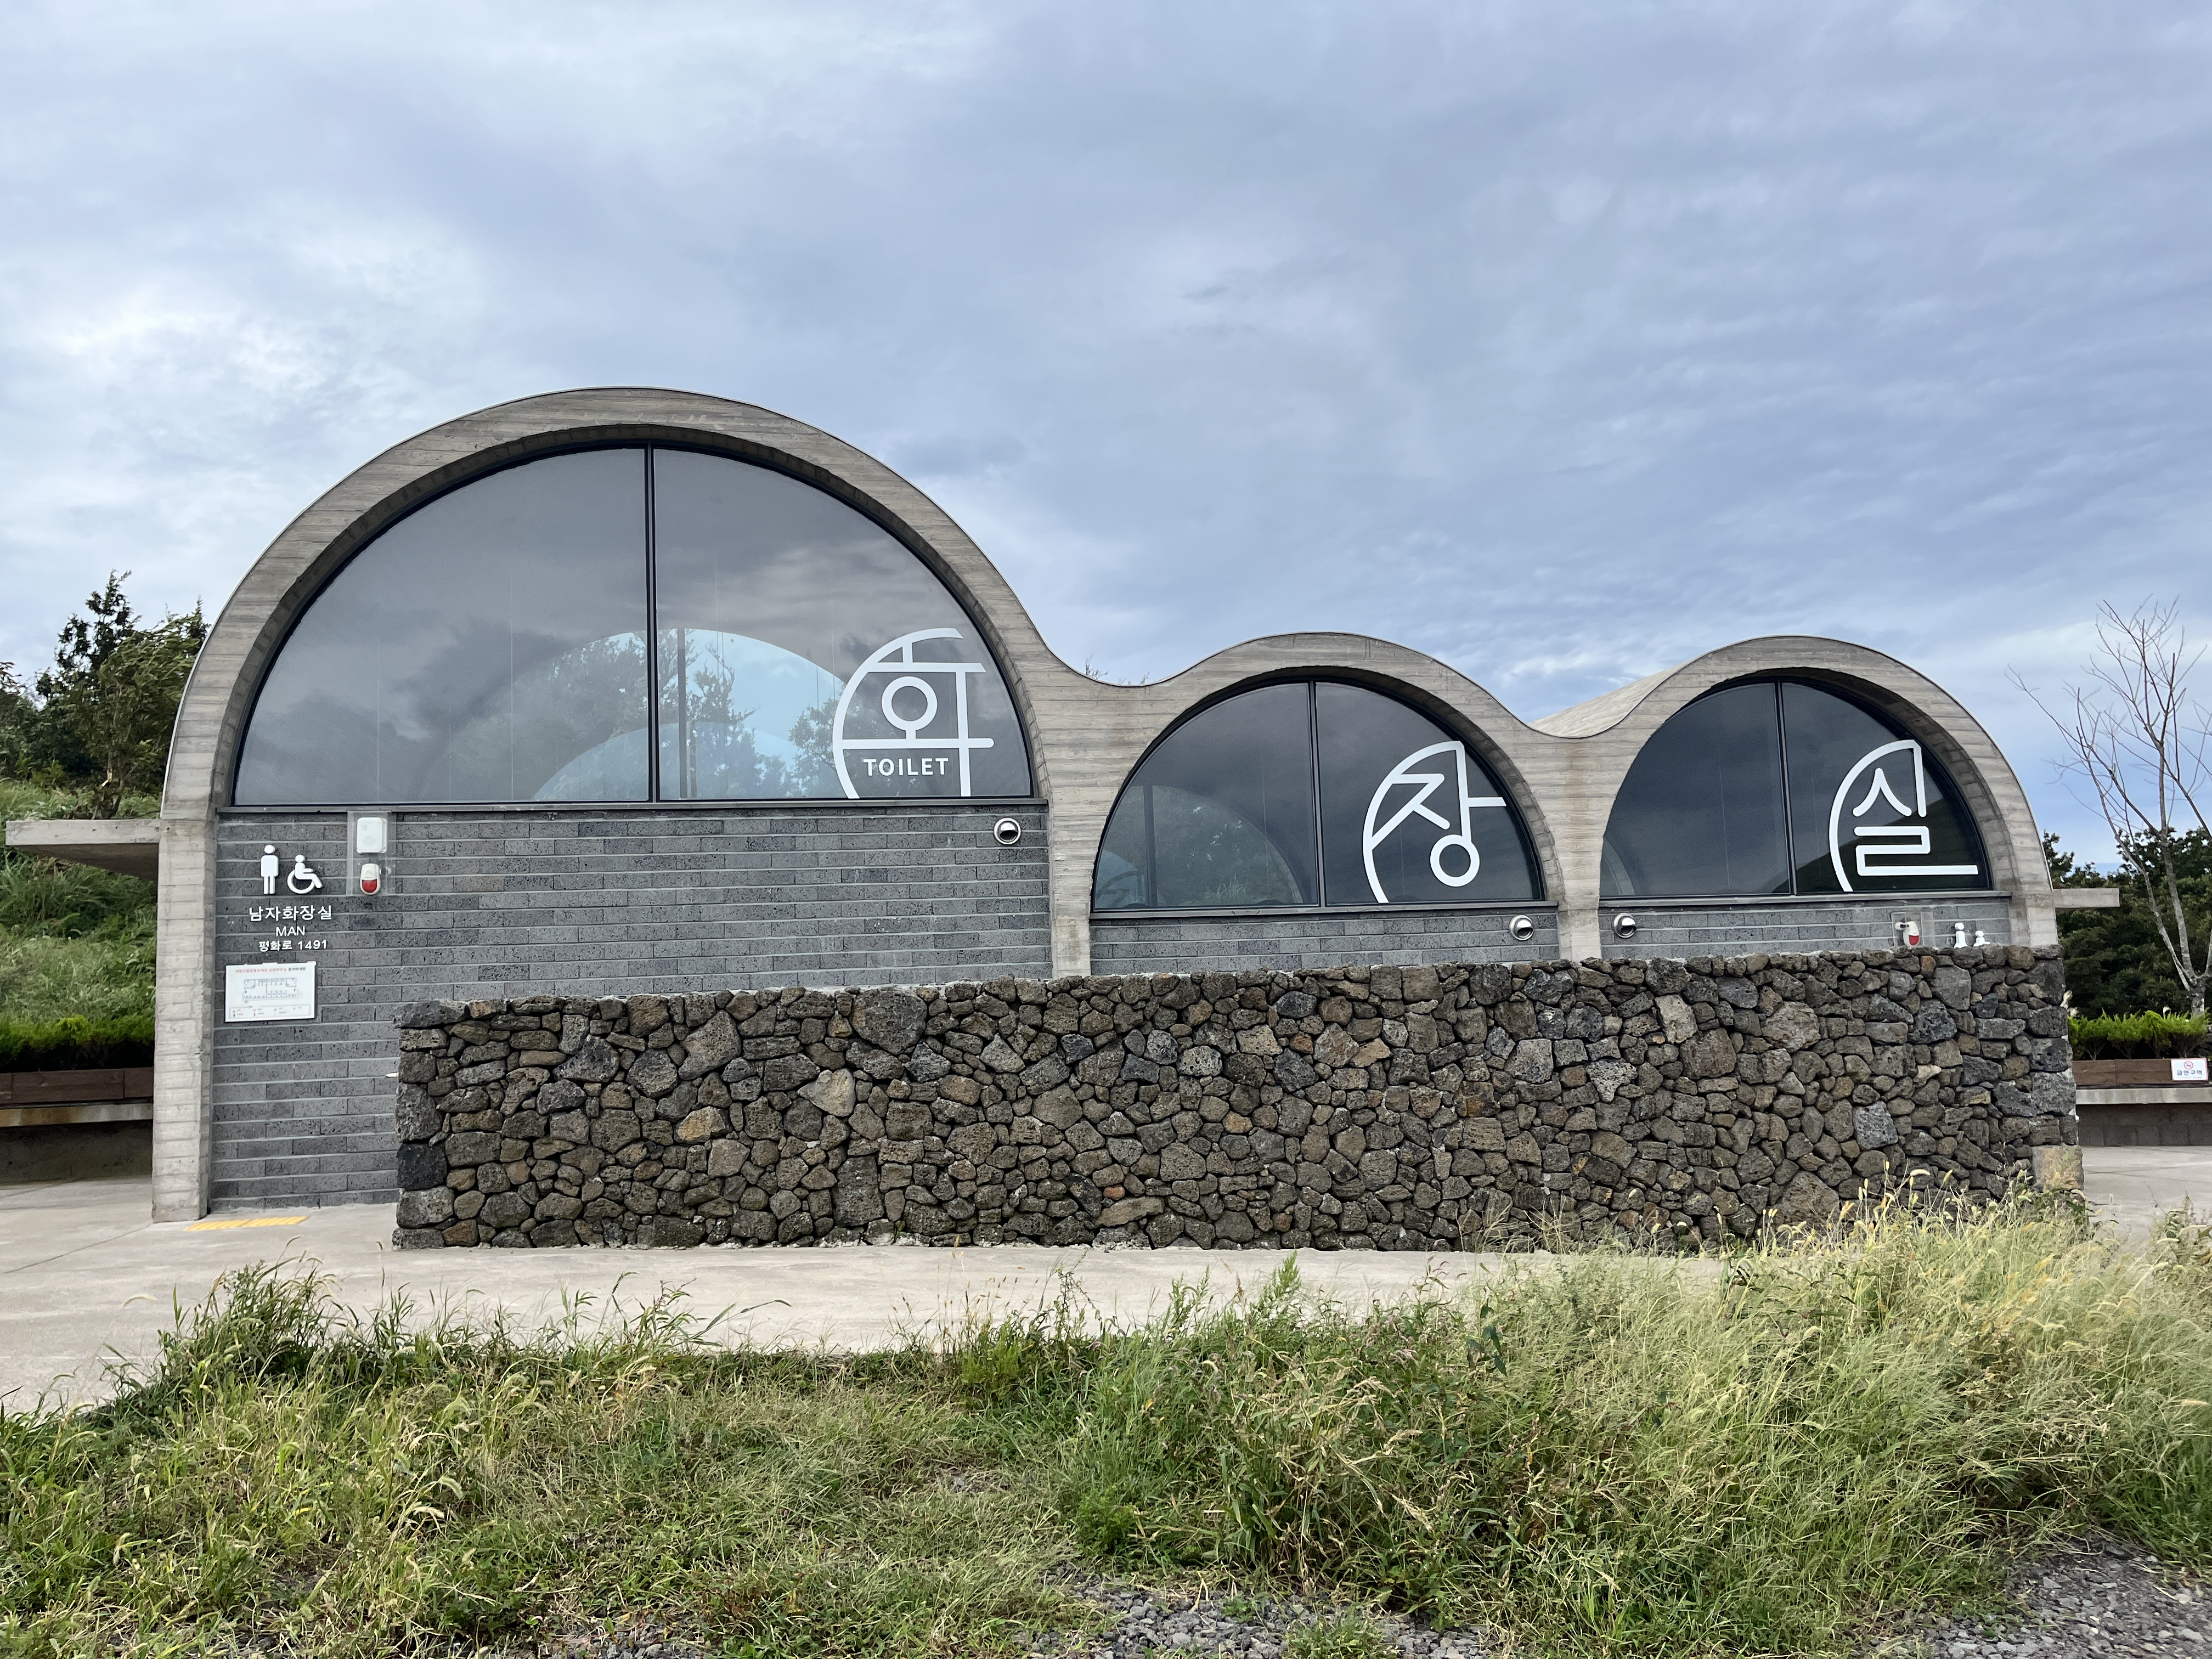

Text(value='새별오름 들불축제장', description='화장실명:', placeholder='화장실 이름')

Button(description='검색', icon='check', style=ButtonStyle(), tooltip='Click me')

In [11]:
def on_image_button_clicked(b):
    clear_output()
    query = "SELECT image FROM toilets WHERE toilet_name = '"
    query += toilet_name_in.value + "'"
    cursor.execute(query)
    url = cursor.fetchall()
    download(url[0][0],"image.jpg")
    display(Image(filename="image.jpg"))
    
    display(toilet_name_in)
    display(image_button)
    
image_button.on_click(on_image_button_clicked)
display(toilet_name_in)
display(image_button)

## SQL 데이터베이스 파일 생성 및 테이블 생성

In [12]:
# SQLite 데이터베이스에 연결 (파일이 없으면 새로 생성)
db = sqlite3.connect('toilets.db')

# 커서 생성
cursor = db.cursor()

cursor.execute("DROP TABLE IF EXISTS toilets")

cursor.execute("DROP TABLE IF EXISTS manager")

# 테이블 생성
cursor.execute('''CREATE TABLE IF NOT EXISTS toilets
                  (data_code text,
                  toilet_name text NOT NULL,
                  laCrdnt real,
                  loCrdnt real,
                  opnTimeInfo text,
                  rnAddress text,
                  diaperExhgTable text,
                  mwmncmnusetoiletYN text,
                  maledspsnclosetcnt INTEGER,
                  maledspsnurinalcnt INTEGER,
                  femaledspsnclosetcnt INTEGER,
                  malechildclosetcnt INTEGER,
                  malechildurinalcnt INTEGER,
                  femalechildclosetcnt INTEGER,
                  distance real,
                  manager text,
                  image text,
                  PRIMARY KEY (data_code)
                  FOREIGN KEY(manager) References manager(manager))''')

cursor.execute('''CREATE TABLE IF NOT EXISTS manager
                  (manager text,
                  tel_no text,
                  PRIMARY KEY (manager))''')

db.commit()

##  API연결 및 데이터 다운로드

In [13]:
# 기본 URL 및 엔드포인트
base_url = 'http://apis.data.go.kr/6510000/publicToiletService'
endpoint = '/getPublicToiletInfoList'

In [14]:
# 전체 URL
url = base_url + endpoint

In [15]:
# 인증키
auth_key = 'lK7qE3buC8LUPwJ7aj9tlf1Dg6L5nD5dm1cTzgCQRTbEY5hsHKLZ5FSNr3WhJ5IUvcep3shAe3ggQeOyRffKdA=='

In [16]:
# 쿼리 파라미터
params = {
    'serviceKey': auth_key,
    # 추가적인 필요한 파라미터 (예: pageNo, numOfRows, 등)
    'pageNo': 1,
    'numOfRows': 999
}

In [17]:
# GET 요청 보내기
response = requests.get(url, params=params)

In [18]:
# 응답 확인
if response.status_code == 200:
    # 성공적인 응답 처리
    try:
        json_data = response.json()
    except json.JSONDecodeError:
        # JSON 형식이 아닌 경우
        print("Response is not in JSON format. Response text:", response.text)
else:
    # 에러 처리
    print("Error:", response.status_code)
    print("Response text:", response.text)

In [19]:
toilets = json_data['response']['body']['items']['item']

## API 데이터 파싱 및 DB에 데이터 입력

In [20]:
for toilet in toilets:
    dataCode = toilet.get('dataCd')
    toilet_name = toilet.get('toiletNm', '이름 없음')
    original_laCrdnt = toilet.get('laCrdnt', '0')
    cleaned_laCrdnt = original_laCrdnt.replace("..", ".").replace(" ", "")
    laCrdnt = float(cleaned_laCrdnt) if cleaned_laCrdnt else 0.0
    original_loCrdnt = toilet.get('loCrdnt', '0')
    cleaned_loCrdnt = original_loCrdnt.replace("..", ".").replace(" ", "")
    loCrdnt = float(cleaned_loCrdnt) if cleaned_loCrdnt else 0.0
    opnTimeInfo = toilet.get('opnTimeInfo', '개방시간 정보 없음')
    rnAdres = toilet.get('rnAdres', '도로명주소 없음')
    diaperExhgTablYn = toilet.get('diaperExhgTablYn')
    mwmnCmnuseToiletYn = toilet.get('mwmnCmnuseToiletYn', '남녀공용정보없음')
    maleDspsnClosetCnt = int(toilet.get('maleDspsnClosetCnt'))
    maleDspsnUrinalCnt = int(toilet.get('maleDspsnUrinalCnt'))
    femaleDspsnClosetCnt = int(toilet.get('femaleDspsnClosetCnt'))
    maleChildClosetCnt = int(toilet.get('maleChildClosetCnt'))
    maleChildUrinalCnt = int(toilet.get('maleChildUrinalCnt'))
    femaleChildClosetCnt = int(toilet.get('femaleChildClosetCnt'))
    photo_url = toilet.get('photo', 'null')
    manager = toilet.get('mngrInsttNm', 'null')
    tell_no = toilet.get('telno', 'null')
    
    
    manager_data = (manager, tell_no)
    
    cursor.execute("insert or ignore into manager values(?, ?)", manager_data)
    
    
    dist = 0
    dbdata = (dataCode, toilet_name, laCrdnt, loCrdnt, opnTimeInfo, rnAdres, diaperExhgTablYn, mwmnCmnuseToiletYn,maleDspsnClosetCnt, maleDspsnUrinalCnt, femaleDspsnClosetCnt, maleChildClosetCnt, maleChildUrinalCnt, femaleChildClosetCnt, dist, manager, photo_url[0])
    
    cursor.execute("insert into toilets values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", dbdata)
    

    
db.commit()